# Sentimental Analysis on Twitter data

## About The Dataset

we have downloaded a kaggle dataset whose link is: https://www.kaggle.com/youben/twitter-sentiment-analysis/data
This datset is having train and test csv files that contains around 400k tweets.
In this Dataset-

0  ->  negative tweet 

1  ->  positive tweet

for easy computing, i have taken only 40k dataset from train csv file and perfrom the machine learning algorithm over that and found out the accuracy.
we have also performed gridsearch for tuning the parameters for increasing accuracy.

## Notebook Overview

various steps that are required to perform sentiment analysis on tweets can be:
1. import all the required libraries
2. import the dataset
3. remove the unnecessary columns if any and limit the dataset to 40k tweets
4. visualize the dataset
5. spilitting the dataset into train and test
6. clean the dataset and prepare for it NLP
7. prepare bag of words model and then TFIDF model
8. initialize the machine learning classifier and fit the train datset into it
9. evaluate the test dataset and make predictions and find out the accuracy
10. identify the parameters that tune will tune the model
11. perform grid search and re fit the train dataset into it
12. evaluate the tuned model and make predictions and find out the accuracy
13. compare the previous and new accuracy

## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import sys
import time
import string
import nltk
from nltk.corpus import stopwords
import re                        
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

## Import the Dataset

In [2]:
data=pd.read_csv(r"C:\Users\prince chauhan\Downloads\train.csv\train.csv",encoding='latin-1')

In [3]:
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


## Limiting the dataset to 40k tweets 

In [4]:
data=data[['Sentiment','SentimentText']][0:40000]

In [5]:
data.tail()

,Sentiment,SentimentText
39995,0,"@AndreaKidd Ouchies, I hope it isn't anything ..."
39996,1,@AndreaKobayashi It's the best cafe in Asakusa...
39997,1,@AndreaKoeln heeey! tonight is the night! no s...
39998,1,@AmandaFClark it is when you add the hammock
39999,0,@amandafortier I am so happy with all the fun...


## Visualize the dataset

In [6]:
data.describe()

,Sentiment
count,40000.000000
mean,0.523800
std,0.499439
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
Sentiment        40000 non-null int64
SentimentText    40000 non-null object
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

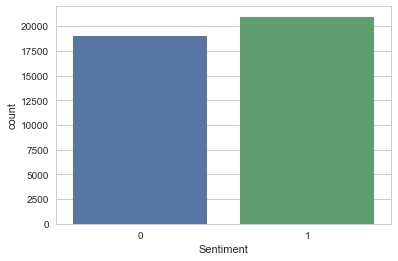

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Sentiment',data=data,)

## Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=data['SentimentText']
y=data['Sentiment']

In [12]:
#we will use 20% od datset for testing and rest for training
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20)

## Text Preprocessing

tweets normally contain emojis,tag names,punctuations,links,numbers and other things along with useful text
so, in this step we will remove-

1. links
2. stopwords(those words which do not give any useful information and usually includes the,a,an,of,is,etc.)
3. numbers
4. emoticons
5. punctuations
6. extra spaces

Here we will use lemmatizer instead of stemmer.As both reduce a given word to its root form but lemmatizer give words that have some meaning unlike stemmer.

In [13]:
def text_process(mess):
    return_text=[]
    lem=WordNetLemmatizer()
    nopunc = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*','', mess, flags=re.MULTILINE)
    nopunc = re.sub(r'www.[^ ]+','', nopunc, flags=re.MULTILINE)
    nopunc=[char for char in nopunc if char not in string.punctuation+'0123456789']
    nopunc=''.join(nopunc)
    nopunc=[word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    for x in nopunc:
        y=(lem.lemmatize(x))
        return_text.append(y)
    return return_text

In [14]:
print(text_process(data['SentimentText'][29999]))

['adamjackson', 'mcdonalds', 'promoting', 'mccafe', 'similar', 'starbucks', 'may', 'soon', 'see', 'mcsmoothies', 'like', 'jamba', 'juice', 'next']


## Prepare Bag of Words model and TF-IDF model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
#bag of words model
bow_transformer = CountVectorizer(min_df=1,analyzer=text_process).fit(xtrain)
review_bow = bow_transformer.transform(xtrain)

# tf-idf model
tfidf_transformer=TfidfTransformer().fit(review_bow)
data_tfidf=tfidf_transformer.transform(review_bow)

In [17]:
review_bow.shape

(32000, 43515)

In [18]:
data_tfidf.

(32000, 43515)

## Initialize the classifier and fit the training data

Here, we will use <b>support vector machine</b> classifier

In [19]:
from sklearn.svm import SVC
review_detect_model =  SVC()

#fitting the training dataset
review_detect_model.fit(data_tfidf,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Evaluating the SVM model and make predictions

In [20]:
rev_bow_test= bow_transformer.transform(xtest)
tfidf_predict=tfidf_transformer.transform(rev_bow_test)

#predictions using svm classifier
y_pred_svc=review_detect_model.predict(tfidf_predict)
y_pred_svc=(y_pred_svc>0.5)

In [21]:
# confusion matrix and classification report for easy visualization

from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(ytest,y_pred_svc))
print("confusion matrix:")
print (confusion_matrix(ytest,y_pred_svc))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3796
          1       0.53      1.00      0.69      4204

avg / total       0.28      0.53      0.36      8000

confusion matrix:
[[   0 3796]
 [   0 4204]]


C:\Users\prince chauhan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
x=((0+4204)/8000)*100
"accuracy of Support Vector Machine Classifier: "+str(x)

'accuracy of Support Vector Machine Classifier: 52.55'

## Analyze the classification report
### identify the parameters that should be tuned to increase accuracy

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.<br>
Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).
<br>
We have not touched any parameters in above SVM classifier which needed to be taken into consideration. so default values of those parameters lead to uncorrect classification.

parameters like <b>'C'</b> need to be have a good value because it manage <b>bias variance tradeoff</b>.<br>
<b>gamma</b> parameter also need to be have some value other than default auto value.it should be small.<br>
<b>verbose</b> parameter should also have some value otherwise it would take 0 as default.<br><br>
so, these parameters need to be tuned. we can perform grid search to overcome this problem.

## Perform the Grid Search

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [42]:
from sklearn.grid_search import GridSearchCV
# params={'C':[1,10,100],'gamma':[0.01,0.001,0.0001]}

#best param after grid search on various other parameter values
params={'C':[100],'gamma':[0.001]}

grid=GridSearchCV(SVC(),params,verbose=3,n_jobs=-1)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [30]:
grid.fit(data_tfidf,ytrain)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [100], 'gamma': [0.001]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=3)

## Evaluate the new tuned model and make predictions

In [31]:
# best parametersin grid search
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [32]:
predicted_values=grid.predict(tfidf_predict)

In [33]:
# classification report and confusion report
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(ytest,predicted_values))
print("confusion matrix:")
print (confusion_matrix(ytest,predicted_values))

             precision    recall  f1-score   support

          0       0.77      0.66      0.71      3796
          1       0.73      0.82      0.77      4204

avg / total       0.75      0.74      0.74      8000

confusion matrix:
[[2492 1304]
 [ 746 3458]]


In [36]:
x2=((2492+3458)/8000)*100
"accuracy of Support Vector Machine Classifier: "+str(x2)

'accuracy of Support Vector Machine Classifier: 74.375'

## Compare the accuracies

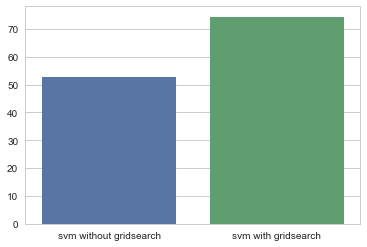

In [41]:
sns.barplot(x=['svm without gridsearch','svm with gridsearch'],y=[x,x2])

It is clearly seen that accuracy of svm classifier increases by using grid search.because all the hyper parameter that invlove in bias-variance trade off, and gamma parameter are all tuned.<br>

## HOW TO FURTHER INCREASE ACCURACY 

There are few things that we could have done to increase the accuracy of this sentimental analysis project.

* we can use <b>neural network model</b> for increasing accracy . In that we can do
  1.  We can do a grid search in tensorflow to find out the best hyper-parameters for our model.
  2.  We can also make our model more deep i.e., add few more layers which could increase the accuracy.
  <br><br>
*  We could have use use Word2Vec Algorithm to generate word embeddings which could help in increasing accuracy.
*  Dataset size could have been increased.
Could have trained model for a greater number of epochs.
<br><br>
Due to unavailability of computation power our above suggested ways are not used.